<a href="https://colab.research.google.com/github/AnasAlhasan/AssociateRuleLearning/blob/main/market_basket_apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
!pip install apyori
from apyori import apriori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=40565c6d500f86c1f1d6fa359666218746a2b6faa51ae6a3222164d7da975869
  Stored in directory: /root/.cache/pip/wheels/7f/49/e3/42c73b19a264de37129fadaa0c52f26cf50e87de08fb9804af
Successfully built apyori


In [ ]:
dataset = pd.read_csv('Groceries_dataset.csv')
transactions = dataset.groupby(['Member_number','Date'])['itemDescription'].apply(list).tolist()
transactions


In [ ]:
rules = apriori(transactions= transactions, min_support=0.014,min_confidence=0.01, min_length= 2 ,max_length= 2)
results = list(rules)


In [ ]:
def inspect(results):
    lhs = []
    rhs = []
    supports = []
    confidences = []
    lifts = []

    for result in results:
        # The first item in the RelationRecord is the itemset (e.g., frozenset({'item1', 'item2'}))
        itemset = result[0]
        # The second item is the support of the itemset
        support = result[1]

        # The third item is a list of OrderedStatistic objects, one for each rule found
        ordered_statistics = result[2]

        for statistic in ordered_statistics:
            # Check if there is an antecedent (LHS) for the rule
            # Case 1: The rule has a separate LHS and RHS
            if statistic[0] and statistic[1]:
                lhs.append(tuple(statistic[0]))
                rhs.append(tuple(statistic[1]))
                confidences.append(statistic[2])
                lifts.append(statistic[3])
                supports.append(support)

            # Case 2: The itemset is just a frequent itemset, not a rule
            # This happens when items_base is empty, as seen in your example
            elif not statistic[0]:
                lhs.append(frozenset())
                rhs.append(tuple(statistic[1]))
                confidences.append(statistic[2])
                lifts.append(statistic[3])
                supports.append(support)

    return pd.DataFrame({
        'Left Hand Side': lhs,
        'Right Hand Side': rhs,
        'Support': supports,
        'Confidence': confidences,
        'Lift': lifts
    })
resultsinDataFrame = inspect(results)
resultsinDataFrame

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,(),"(UHT-milk,)",0.021386,0.021386,1.00000
1,(),"(beef,)",0.033950,0.033950,1.00000
2,(),"(berries,)",0.021787,0.021787,1.00000
3,(),"(beverages,)",0.016574,0.016574,1.00000
4,(),"(bottled beer,)",0.045312,0.045312,1.00000
5,(),"(bottled water,)",0.060683,0.060683,1.00000
6,(),"(brown bread,)",0.037626,0.037626,1.00000
7,(),"(butter,)",0.035220,0.035220,1.00000
8,(),"(butter milk,)",0.017577,0.017577,1.00000
9,(),"(candy,)",0.014369,0.014369,1.00000


In [ ]:
rules_df_sorted = resultsinDataFrame.sort_values(by='Lift', ascending=False).reset_index(drop=True)


/tmp/ipython-input-101670726.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_rules['Rule'] = top_10_rules.apply(


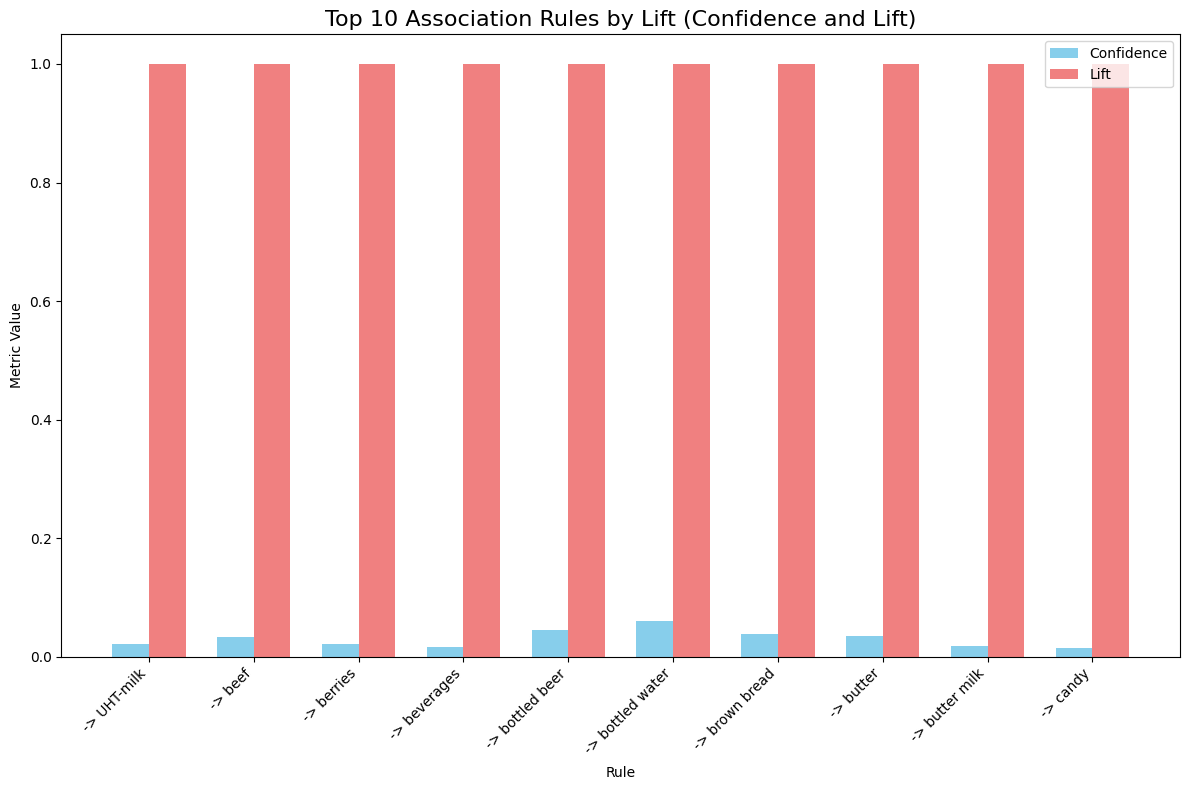

In [ ]:
import matplotlib.pyplot as plt
top_10_rules = rules_df_sorted.head(10)

# Create a combined label for LHS -> RHS for readability
top_10_rules['Rule'] = top_10_rules.apply(
    lambda row: f"{', '.join(row['Left Hand Side'])} -> {', '.join(row['Right Hand Side'])}", axis=1)

# Plotting bar charts for confidence and lift
plt.figure(figsize=(12, 8))
bar_width = 0.35
index = range(len(top_10_rules))

# Plot confidence bars
plt.bar(index, top_10_rules['Confidence'], bar_width, label='Confidence', color='skyblue')

# Plot lift bars next to confidence bars
plt.bar([i + bar_width for i in index], top_10_rules['Lift'], bar_width, label='Lift', color='lightcoral')

plt.xlabel('Rule')
plt.ylabel('Metric Value')
plt.title('Top 10 Association Rules by Lift (Confidence and Lift)', fontsize=16)
plt.xticks([i + bar_width / 2 for i in index], top_10_rules['Rule'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()
